# [PUBPOL190] Introduction to Data Visualization

**Estimated time:** 60 minutes

**Notebook developed by:** <br>
Team Lead: Skye Pickett  <br>
Fall 2022 Developers: Leah Hong, Emily Guo, Reynolds Zhang <br>
Summer 2022 Developers: Vaidehi Bulusu, Leah Hong, Drishti Gupta, Hans Ocampo <br>


### Learning Outcomes


In this notebook, you will learn about:
- How to explore datasets
- How to prepare data to be visualizaed
- The purpose of different visualizations 
- How to create and code visualizations
- How to analyze and draw insights from visualizations


### Table of Contents
1. [What is Data Visualization?](#1.-What-is-Data-Visualization?)
1. [Introducing the Dataset](#2.-Introducing-the-Dataset)
1. [Exploring the Dataset](#3.-Exploring-the-Dataset)
1. [Data Visualizations](#4.-Data-Visualizations)
    1. [Line Plots](#4.1-Line-Plots)
    1. [Bar Charts](#4.2-Bar-Charts)
    1. [Scatter Plots](#4.3-Scatter-Plots)
    1. [Histograms](#4.4-Histograms)
1. [Advanced Visualizations](#5.-Advanced-Visualizations)
    1. [Boxplot](#5.1-Boxplot)
    1. [Pie Chart](#5.2-Pie-Chart)
    1. [Violin Plot](#5.3-Violin-Plot)
1. [Conclusion](#6.-Conclusion)
1. [Submitting Your Work](#7.-Submitting-Your-Work)
1. [Explore Data Science Opportunities](#8.-Explore-Data-Science-Opportunities)
1. [Feedback Form](#9.-Feedback-Form)

***

### Helpful Data Science Resources 
Here are some resources you can check out while doing this notebook and to explore data visualization further!
- [DATA 8 Textbook](https://inferentialthinking.com/chapters/07/Visualization.html) - Visualization chapter
- [Reference Sheet for the datascience Module](http://data8.org/sp22/python-reference.html)
- [Documentation for the datascience Modules](http://data8.org/datascience/index.html)
- [Cool Data Visualizations](https://www.tableau.com/learn/articles/best-beautiful-data-visualization-examples)
- [Statistica: Find Data on Interesting Topics](https://www.statista.com/)
- [Exploratory Data Analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis)


### Peer Consulting

If you find yourself having trouble with any content in this notebook, Data Peer Consultants are an excellent resource! Click [here](https://dlab.berkeley.edu/training/frontdesk-info) to locate live help.

Peer Consultants are there to answer all data-related questions, whether it be about the content of this notebook, applications of data science in the world, or other data science courses offered at Berkeley.

***
# 1. What is Data Visualization?

Data visualization is a powerful technique that allows us to understand our data. We can use visualizations for a variety of purposes:

- To see how a variable changes over time (e.g. do wages among the youth increase or decrease over time?)
- To explore relationships between variables (e.g. how does your income change as you get more education?)
- To see how data is distributed (e.g. is the data for average income spread out or concentrated around one value?) 

And more! In this notebook, we'll be looking at the visualizations we can use for each of the above purposes. Let's start by looking at our dataset.

***
# 2. Introducing the Dataset

The [U.S. Bureau of Labor Statistics](https://www.bls.gov/) has data on a variety of topics related to labor, including wages for different occupations, unemployment rates, labor productivity, and more. Feel free to check out some of the datasets in the [BLS Data Finder](https://www.bls.gov/data/)!

For this notebook, we'll be looking at data from the [American Time Use Survey](https://www.bls.gov/tus/). This is an annual survey that asks people how much time they spend on various activities, including work, education, volunteering, socializing, sports and more. 

ATUS is sponsored by the Bureau of Labor Statistics and conducted by the U.S. Census Bureau. The Census Bureau collects and processes the data. Data collection began in January 2003, and the first estimates were published on September 14, 2004. <br>
*Survey eligibility requirement:* Households that have completed their final (8th) month of the Current Population Survey are eligible for the ATUS. From this eligible group, households are selected that represent a range of demographic characteristics. Then, one person age 15 or over is randomly chosen from the household to answer questions about his or her time use. This person is interviewed for the ATUS 2-5 months after the household's final CPS interview.





**We'll specifically looking at the average number of hours people spent per day on work and education-related activities *for the 25-34 age group*.**

Now we're ready to explore the datasets!


***
# 3. Exploring the Dataset

## 3.1 Importing and Understanding Tables

In sections 3 and 4, we will be performing exploratory data analysis (EDA). Through EDA, we can examine the characteristics of and find trends and patterns in our data. In section 3, we'll explore our datasets. In section 4, we will visualize our data.

We can start by importing the necessary packages in the cell below, then importing the education dataset subsequently. 

In [34]:
# RUN THIS CELL
# Import the required modules
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

> **`Table().read_table(...)`**: allows you to import data as a table (takes in the name of the csv file as the argument)


In [35]:
educ = Table().read_table("Data/educ.csv")
educ

Year,All,Women,Men
2011,0.37,0.28,0.45
2012,0.4,0.39,0.42
2013,0.41,0.34,nan
2014,0.38,0.46,0.3
2015,0.29,0.34,0.24
2016,0.31,0.28,nan
2017,0.35,0.36,0.34
2018,0.28,0.31,0.24
2019,0.36,0.34,0.39
2021,0.29,0.29,0.29


This table has the average number of hours people spent per day on education-related activities (including attending class, doing homework, and commuting) for the 2011-2021 time period for men and women.

*Note: The BLS wasn't able to collect data for 2020 because of Covid-19.*


<font color = #d14d0f>

#### Question 1:
The work dataset is stored as `work.csv`. Use the `Table.read_table` function to import this dataset. <br>
Follow the same format as before: `educ = Table().read_table("Data/educ.csv")`

In [36]:
work = ...
work

Ellipsis

Now that we've imported our datasets, we can examine some of its characteristics.

    
> **`.num_rows`**: gives you the number of rows in the table <br>
> **`.num_columns`**: gives you the number of columns in the table <br>
> **`.labels`**: gives you the names of the columns in the table
    


In [37]:
educ.num_rows

10

In [38]:
educ.num_columns

4

In [39]:
educ.labels

('Year', 'All', 'Women', 'Men')


<font color = #d14d0f>

#### Question 2:
Use `.num_rows`, `.num_columns` and `.labels` on the `work` table.

In [40]:
#.num_rows
...

In [41]:
#.num_columns
...

In [42]:
#.labels
...

## 3.2 NaN Values

You might have noticed the NaN values in the `Men` column of the `educ` table. NaN stands for "Not a Number" and is generally used to represent missing values. We have to deal with these values as otherwise, they will interfere with our data analysis and visualization. One way to deal with NaN values is by filtering the table so that it doesn't have these values. This is an important step in [data cleaning](https://en.wikipedia.org/wiki/Data_cleansing). Later on, we will have an entire notebook dedicated to more complex data cleaning.

The first row that contains a NaN value is the row for the year 2013. Let's use table filtering to remove this row.


> **`.where`**: filter a table based on the values of a particular column (see the `Table.where` Predicates section of the [Python reference](http://data8.org/sp22/python-reference.html) for the list of predicates you can use)
     


In [43]:
educ = educ.where("Year", are.not_equal_to(2013))
educ

Year,All,Women,Men
2011,0.37,0.28,0.45
2012,0.4,0.39,0.42
2014,0.38,0.46,0.3
2015,0.29,0.34,0.24
2016,0.31,0.28,nan
2017,0.35,0.36,0.34
2018,0.28,0.31,0.24
2019,0.36,0.34,0.39
2021,0.29,0.29,0.29



<font color = #d14d0f>

#### Question 3:
Use table filtering to remove the other row with a NaN value.

In [44]:
educ = ...
educ

Ellipsis

***
# 4. Data Visualizations

Now we can start visualizing our data!

## 4.1 Line Plots

A line plot is used to display data as a series of points connected by a line. It's generally used to visualize how a variable changes over time (also known as [time series data](https://www.investopedia.com/terms/t/timeseries.asp) data). It has a time-related variable on the x-axis (minutes, days, months, years, etc.) and a numerical variable on the y-axis.

Let's create a line plot to see how the average number of hours people spend on education changes over the years.

    
> **`tablename.plot(x, y)`**: create a line plot (the first argument is the variable on the x-axis and the second argument is the variable on the y-axis)
    

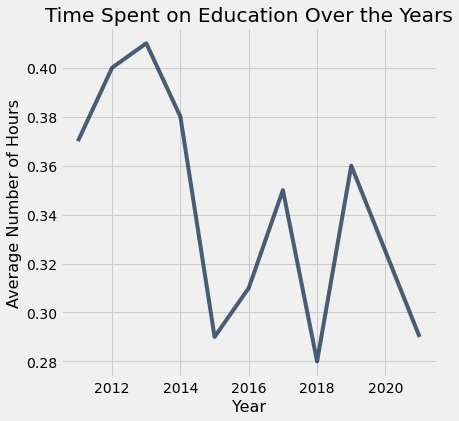

In [19]:
educ.plot("Year", "All")
plt.ylabel("Average Number of Hours")
plt.title("Time Spent on Education Over the Years")
plt.show()


<font color = #d14d0f>

#### Question 4:  
What trends do you notice in this line plot? Specifically:
- During which time periods did the average hours spent on education fall?
- During which time periods did the average hours spent on education rise?

*Type your answer here. Double-click to edit this cell. Run this cell to proceed when finished.*

<br>Now, we'll repeat the same process as above on the `work` table. Reference the process above if you feel stuck!


<font color = #d14d0f>

#### Question 5:
Create a similar line plot for the `work` dataset below. Replace the `...` with your code.

*Hint: Use the `All` column.*

In [ ]:
# run this cell to recall what the table looks like
work

In [ ]:
work.plot(..., ...) 
plt.ylabel("Average Number of Hours")
plt.title("Time Spent on Work Over the Years")
plt.show()


<font color = #d14d0f>

#### Question 6:

What trends do you notice in this line plot? Specifically:
- During which time periods did the average hours spent on work fall?
- During which time periods did the average hours spent on work rise?

*Type your answer here. Double-click to edit this cell. Run this cell to proceed when finished.*

### Overlaid Line Plots

To see how education and work change together, we can create overlaid line plots. To do this, let's first create a table with the data for both education and work.


>`Table().with_columns`: create a new table by adding columns (the first argument is the name of the column and the second argument is the array) <br>
>`.column`: select a column from a given table as an array <br>
     


In [ ]:
educ_and_work = Table().with_columns("Year", educ.column("Year"),
                                    "Education", educ.column("All"),
                                    "Work", work.column("All"))
educ_and_work

To create overlaid line plots, we just have to specify the x-variable.

> **`plt.ylabel`**: Set the label for the y-axis <br>
**`plt.title`**:  Set a title for the Axes. <br>
**`plt.show()`**:  Display all open figures.  


In [ ]:
educ_and_work.plot("Year")
plt.ylabel("Average Number of Hours")
plt.title("Time Spent on Education and Work Over the Years")
plt.show()

This allows us to create line plots for both education and work data on the same graph.

<font color = #d14d0f>
    
#### Question 7:
What do you notice about the difference between the average number of hours people spend on education and work? Why might there be this discrepancy?

*Hint: The age group we're considering is 25-34. Could this have something to do with the difference?*

*Type your answer here. Double-click to edit this cell. Run this cell to proceed when finished.*

<br><font color = #d14d0f> **Optional Question:** <br>
You can perform background research on any major events that happened during different time periods that would explain the trends during those periods. For example, we can see from the overlaid graph that the amount of time people spent on both education and work was falling during 2019-2021. This is likely because of the Covid-19 pandemic. Similarly, you can look up what happened during other time periods that would explain the trends in education, work, or both during those periods.

*Type your answer here. Double-click to edit this cell. Run this cell to proceed when finished.*

#### Overlaid Line Plots for Different Genders

When performing data analysis, we often break up our data into different groups based on factors such as gender and ethnicity. In our case, we have so far looked at the combined data for men and women. Now, let's create *separate line plots for each gender.*

We first have to make sure that our table only has the relevant variables: the year, values for women and values for men. To do this, we have to get rid of the column with the combined values.

>**`.drop`**: remove a column from a table (takes the name of the column as the argument)
    

In [21]:
educ_new = educ.drop("All")
educ_new

Year,Women,Men
2011,0.28,0.45
2012,0.39,0.42
2013,0.34,nan
2014,0.46,0.3
2015,0.34,0.24
2016,0.28,nan
2017,0.36,0.34
2018,0.31,0.24
2019,0.34,0.39
2021,0.29,0.29


*Important Note: we have to make sure that we are assigning `educ.drop("All")` to a variable. Otherwise, our original table will remain the same.*

<font color = #d14d0f>

#### Question 8:
Create overlaid line plots for men and women. An illustration of how to do this is above question 7. <br>
    
*Hint: We only need to put 1 column in the parentheses of plot(...). This column is what we want the x axis to represent. The y-axis will be the average number of hours, with one line for Women and one line for Men.*

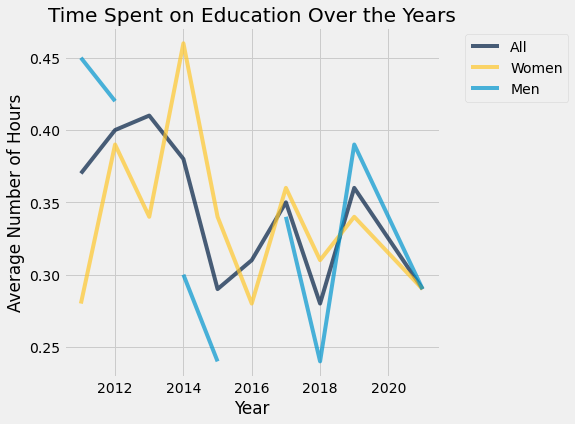

In [24]:
educ.plot(...)
plt.ylabel("Average Number of Hours")
plt.title("Time Spent on Education Over the Years")
plt.show()


<font color = #d14d0f>

#### Question 9:
[One study](https://www.pewresearch.org/fact-tank/2021/11/08/whats-behind-the-growing-gap-between-men-and-women-in-college-completion/) found that women are more likey than men to complete college. [Another study](https://www.aei.org/carpe-diem/women-earned-majority-of-doctoral-degrees-in-2019-for-11th-straight-year-and-outnumber-men-in-grad-school-141-to-100/) found that women are also more likely to attend graduate school. Are your line plots above consistent with these claims? How can you tell? Based on our data, during what years would these claims be correct or false?

*Type your answer here. Double-click to edit this cell. Run this cell to proceed when finished.*

## 4.2 Bar Charts

Another visualization we can use to see how the time spent on each activity changes over the years is a bar chart. **A bar chart is used to visualize the distribution of a categorical variable.** In this case, `Year` is a categorical variable as it can be divided into distinct groups, so we can use a bar chart to visualize how the data is distributed across the years. The bar chart is a familiar way of visualizing categorical distributions. It displays a bar for each category where the bars are equally spaced and equally wide. The length of each bar is proportional to the frequency of the corresponding category.

Run the cell below to see the how the average number of hours spent on education varies by year in our `educ` table. *Pay attention to what is being plotted in the code below. Notice that "Year" is on the x-axis and "All" is on the y-axis. The label on the y-axis doesn't say "All" since the 2nd line of code specifies a y-label.*

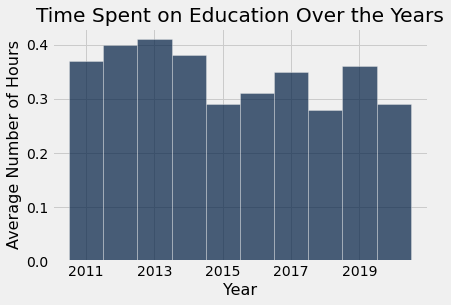

In [26]:
educ.bar("Year", "All")
plt.ylabel("Average Number of Hours")
plt.title("Time Spent on Education Over the Years")
plt.show()

This bar chart shows that in general, the time people spent on education is falling over time – this is consistent with what we saw in the line plot.


<font color = #d14d0f>

#### Question 10:
Create a bar chart to visualize the time spent on work. Copy the first line of code that created the above bar graph and modify it to represent the `work` table.

In [ ]:
...
plt.ylabel("Average Number of Hours")
plt.title("Time Spent on Work Over the Years")
plt.show()


<font color = #d14d0f>

#### Question 11:
Do you notice a trend in the amount of time people spent on work? Is it generally increasing, decreasing, or constant?

*Type your answer here. Double-click to edit this cell. Run this cell to proceed when finished.*

## 4.3 Scatter Plots

Another type of data visualization that is really important in statistics is the scatter plot. **Scatter plots are used to visualize the relationship between two numerical variables.**

Specifically, it allows us to infer the association between two variables. Association refers to how one variable (the y-variable) changes with respect to the other variable (the x-variable). See [this chapter](https://inferentialthinking.com/chapters/15/Prediction.html) in the DATA 8 textbook for reference.

We can describe the association between two variables based on two factors:

1. Magnitude: Is the association strong or weak? If the points on the scatter plot all line up along a straight line (in any direction) or "blob", it means that the association between the variables is strong. On the other hand, if the points are all spread out, it means that the association is weak.

2. Direction (or sign): Is the association positive or negative? If the points on the scatter plot line up along an upward sloping line, it means that the association between the variable is positive. If they line up along a downward sloping line, the association is negative.

Now that we understand what scatter plots are and how to interpret them, let's create one to visualize the association between the amount of time people spend on work and education.

> **`.scatter`:** create a scatter plot (the first argument is the variable on the x-axis and the second argument is the variable on the y-axis)
     

In [27]:
educ_and_work.scatter("education", "work")
plt.xlabel("Average Hours Spent on Education")
plt.ylabel("Average Hours Spent on Work")
plt.title("Work vs. Education")
plt.show()

NameError: name 'educ_and_work' is not defined


<font color = #d14d0f>

#### Question 12:
How would you describe the association you see in the scatter plot above? Make sure to describe both the magnitude and the direction.

*Type your answer here. Double-click to edit this cell. Run this cell to proceed when finished.*


<font color = #d14d0f>

#### Question 13:
Create another scatter plot showing the association between time spent on work and education, but this time with work on the x-axis and education on the y-axis.

In [ ]:
...
plt.xlabel("Average Hours Spent on Work")
plt.ylabel("Average Hours Spent on Education")
plt.title("Education vs. Work")
plt.show()


<font color = #d14d0f>

#### Question 14:
Is there a difference between the two scatter plots above?

*Type your answer here. Double-click to edit this cell. Run this cell to proceed when finished.*

## 4.4 Histograms

**A histogram allows you to visualize the distribution of a numerical variable.** It helps you understand how spread out the values in your table are. A histogram is a visualization of the distribution of a quantitative variable. It looks very much like a bar chart but there are some **important differences** that we will examine in this section.



Histograms follow the area principle and have two defining properties:

1. The bins are drawn to scale and are contiguous (though some might be empty), because the values on the horizontal axis are numerical and therefore have fixed positions on the number line.
1. The area of each bar is proportional to the number of entries in the bin.

The histogram is said to be drawn on the *density scale*. The area of each bar is equal to the percent of data values that are in the corresponding bin.

> **`.hist`**: create a histogram (specify the name of the column, plus other optional arguments)


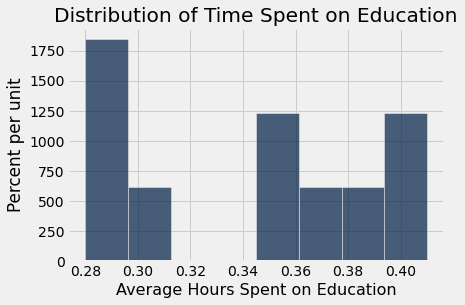

In [29]:
educ.hist("All", bins = 8) #The bins argument allows you to specify how many intervals you want to divide your data into
plt.xlabel("Average Hours Spent on Education")
plt.title("Distribution of Time Spent on Education")
plt.show()

Notice that the y-axis is 'percent per unit.' You can think of this as the density or concentration of values in each bin. For example, the first bin has the highest concentration of values.

<font color = #d14d0f>

#### Question 15:
Create a histogram of the time spent on **work**. Make sure to specify **8 bins** and use the `All` column.

In [ ]:
...
plt.xlabel("Average Hours Spent on Work")
plt.title("Distribution of Time Spent on Work")
plt.show()

***
# 5. Advanced Visualizations

In this section, we'll talk about some advanced visualizations. Note that this section is optional and out of scope for this class.

## 5.1 Boxplot

A boxplot is similar to a histogram as it also **visualizes the distribution of a numerical varirable, but it gives you more specific statistics about the distribution**: the minimum, lower quartile (value at the bottom 25th percentile), median (value at the 50th percentile), upper quartile (value at the top 25th percentile) and maximum.

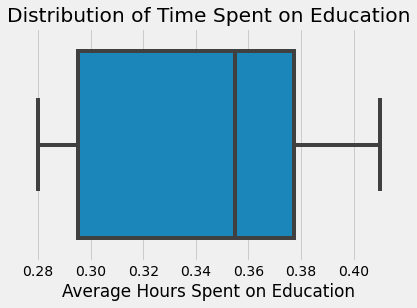

In [30]:
sns.boxplot(educ.column("All"))
plt.xlabel("Average Hours Spent on Education")
plt.title("Distribution of Time Spent on Education")
plt.show()

We can use this boxplot to find approximate values for the following statistics for the education data:

- Minimum: 0.28
- Lower quartile: 0.295
- Median: 0.355
- Upper quartile: 0.38
- Maximum: 0.41

<font color = #d14d0f>

#### Question 16:
   Create a boxplot of the time spent on work in the cell below based on the boxplot of the `educ` table.

In [ ]:
...
plt.xlabel("Average Hours Spent on Work")
plt.title("Distribution of Time Spent on Work")
plt.show()


<font color = #d14d0f>

#### Question 17:
Use the boxplot above to find approximate values for the following statistics for the work data:

- Minimum
- Lower quartile
- Median
- Upper quartile
- Maximum

*Type your answer here. Double-click to edit this cell. Run this cell to proceed when finished.*

## 5.2 Pie Chart

**A pie chart (or a circle chart) is a circular statistical graphic, which is divided into slices to illustrate numerical proportion.** Although pie charts look simple, difficult to compare different sections of a given pie chart, or to compare data across different pie charts makes it difficult to appear professionally, but pie charts are still beautiful and concise plots. 

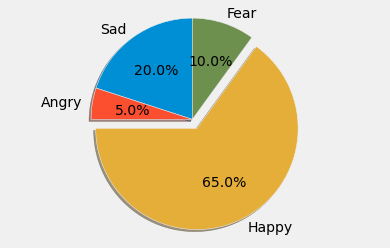

In [31]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Sad', 'Angry', 'Happy', 'Fear'
sizes = [20, 5, 65, 10]
explode = (0, 0, 0.1, 0)  # only "explode" the 3rd slice (i.e. 'Happy')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## 5.3 Violin Plot

A violinplot is a combination of a histogram and boxplot. **It shows you the general distribution of the data (by creating a histogram and drawing a line to capture its general shape) as well as specific statistics (same as the ones a boxplot shows).** [Read here](https://chartio.com/learn/charts/violin-plot-complete-guide/) for information about violin plots.

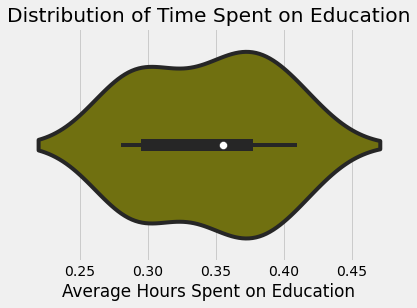

In [33]:
sns.violinplot(educ.column("All"), color = "olive")
plt.xlabel("Average Hours Spent on Education")
plt.title("Distribution of Time Spent on Education")
plt.show()


<font color = #d14d0f>

#### Question 18:
Create a violin plot of the time spent on work.

In [ ]:
...
plt.xlabel("Average Hours Spent on Work")
plt.title("Distribution of Time Spent on Work")
plt.show()

***
# 6. Conclusion


Over the course of this notebook, you were introduced to basic manipulation and analysis of data tables that is frequently necessary in order to create visualizations. Now you've learned about different types of visualizations, practiced creating various plots, and know what visualizations are best for each goal. Feel free to reference this notebook when doing future notebooks that involve visualization.

## Congratulations! You have finished the notebook! ##

***
# 7. Submitting Your Work

**Make sure that you've answered all the questions.**

Follow these steps: 
1. Go to `File` in the menu bar, then select `Save and Checkpoint` (or click CTRL+S).
2. Go to `Cell` in the menu bar, then select `Run All`.
3. Click the link produced by the code cell below.
4. Submit the downloaded PDF on bCourses according to your professor's instructions.

**Note:** If clicking the link below doesn't work for you, don't worry! Simply click `File` in the menu, find `Download As`, and choose `PDF via LaTeX (.pdf)` to save a copy of your pdf onto your computer.

**Check the PDF before submitting and make sure all of your answers and any changes are shown.**

In [45]:
#This may take a few extra seconds.
from otter.export import export_notebook
from IPython.display import display, HTML
export_notebook("Introduction to Data Visualization.ipynb", filtering=True, pagebreaks=False)
display(HTML("<p style='font-size:20px'> <br>Save this notebook, then click <a href='Introduction to Data Visualization.pdf' download>here</a> to open the pdf.<br></p>"))

OSError: xelatex not found on PATH, if you have not installed xelatex you may need to do so. Find further instructions at https://nbconvert.readthedocs.io/en/latest/install.html#installing-tex.

***
# 8. Explore Data Science Opportunities

Interested in learning more about how to get involved in data science or learn about data science applications in your field of study? The following resources might help support your learning:
- Data Science Modules: http://data.berkeley.edu/education/modules
- Data Science Offerings at Berkeley: https://data.berkeley.edu/academics/undergraduate-programs/data-science-offerings
- Data 8 Course Information: http://data8.org/
- Data 100 Course Information: https://ds100.org/

***
# 9. Feedback Form 

<div class="alert alert-info">
<b> We encourage students to fill out the following feedback form to share your experience with this Module notebook. This feedback form will take no longer than 5 minutes. At UC Berkeley Data Science Undergraduate Studies Modules, we appreciate all feedback to improve the learning of students and experience utilizing Jupyter Notebooks for Data Science Education: </b> 
</div>

# [UC Berkeley Data Science Feedback Form](https://forms.gle/hipxf2uFw5Ud4Hyn8)